In [235]:
import pickle
import matplotlib.pyplot as plt
import os
import os.path as osp
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [236]:
base_path = '/lfs/local/0/nomir/learning-subspaces/learning-subspaces-results/cifar/eval-one-dimensional-subspaces'
files = np.array(os.listdir(base_path))

In [237]:
files = files[np.vectorize(lambda s: s.endswith('.pkl'))(files)]
print(f'Found {len(files)} files')

Found 220 files


In [230]:
data = []
for filename in tqdm(files):
    with open(osp.join(base_path, filename), 'rb') as file:
        file_data = np.vectorize(lambda s: s.split('=')[1])(filename.split('+'))
        file_data[-1] = file_data[-1][0]
        pickle_data = pickle.load(file)
        per_class_acc = pickle_data['class_acc'].cpu().numpy()
        test_acc = pickle_data['test_acc']
        file_data = np.concatenate((file_data, per_class_acc, test_acc), axis=None)
        data.append(file_data)

100%|████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<00:00, 1335.76it/s]


In [231]:
column_names = np.vectorize(lambda s: s.split('=')[0])(files[0].split('+')).tolist()
df = pd.DataFrame(data, columns=column_names + [f'{c}' for c in range(10)] + ['Test acc'])
df = df.astype({'alpha0': float, 'alpha1': float, 'try': int, 'num_samples': int, 'seed': int})
df = df.astype({f'{c}': float for c in range(10)})
df = df[df['try'] == 0]

In [232]:
df = df.melt(id_vars=column_names, var_name='Class', value_name='accuracy')

In [233]:
df[(df['id']=='lines') & (df['alpha1']==0.50)]

,id,ln,beta,num_samples,seed,alpha0,alpha1,try,Class,accuracy
0,lines,0.0,1.0,1,0,0.5,0.5,0,0,0.934
39,lines,0.0,1.0,1,1,0.5,0.5,0,0,0.934
84,lines,0.0,1.0,1,0,0.5,0.5,0,1,0.968
123,lines,0.0,1.0,1,1,0.5,0.5,0,1,0.962
168,lines,0.0,1.0,1,0,0.5,0.5,0,2,0.889
207,lines,0.0,1.0,1,1,0.5,0.5,0,2,0.886
252,lines,0.0,1.0,1,0,0.5,0.5,0,3,0.819
291,lines,0.0,1.0,1,1,0.5,0.5,0,3,0.818
336,lines,0.0,1.0,1,0,0.5,0.5,0,4,0.939
375,lines,0.0,1.0,1,1,0.5,0.5,0,4,0.935


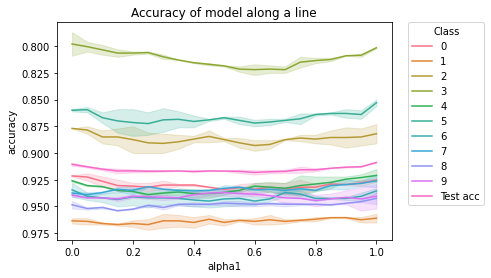

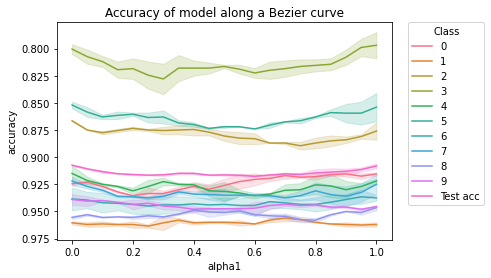

<Figure size 432x288 with 0 Axes>

In [234]:
for subspace, name in zip(['lines', 'curves'], ['a line', 'a Bezier curve']):
    df_specific = df[df['id']==subspace]
    fig = sns.lineplot(data=df_specific, x='alpha1', y='accuracy', hue='Class')
    fig.set_title(f'Accuracy of model along {name}')
    plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    fig.get_figure().savefig(osp.join(base_path, f'{subspace}_class-accuracy_v_alpha.pdf'), bbox_inches='tight')
    plt.clf()

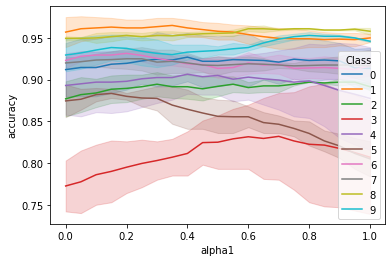

In [132]:
df_lines = df[df['id']=='lines']
fig = sns.lineplot(data=df_curves, x='alpha1', y='accuracy', hue='Class')
fig.set_title('Accuracy of model along line')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.get_figure().savefig(osp.join(base_path, 'line_class-accuracy_v_alpha.pdf'), bbox_inches='tight')

In [134]:
fig.get_figure().savefig(osp.join(base_path, 'class-accuracy_v_alpha.pdf'))

In [140]:
df

,id,ln,beta,num_samples,seed,alpha0,alpha1,try,Class,accuracy
0,lines,0.0,1.0,1,1,0.80,0.20,1,0,0.888
1,curves,0.0,1.0,1,0,0.05,0.95,0,0,0.920
2,curves,0.0,1.0,1,0,0.90,0.10,0,0,0.896
3,lines,0.0,1.0,1,0,0.35,0.65,1,0,0.946
4,lines,0.0,1.0,1,0,0.40,0.60,1,0,0.955
...,...,...,...,...,...,...,...,...,...,...
875,lines,0.0,1.0,1,1,0.10,0.90,1,9,0.954
876,lines,0.0,1.0,1,1,0.55,0.45,1,9,0.942
877,lines,0.0,1.0,1,0,0.70,0.30,1,9,0.915
878,curves,0.0,1.0,1,0,0.60,0.40,0,9,0.946
